Objetivo
--------

-   Poner en práctica las etapas de construcción de un sistema de
    aprendizaje automático.
-   Programar una implementación propia del algoritmo ID3
-   Usar una biblioteca de AA con el algoritmo ID3 ya programado.
-   Implementar un random forest.

Introducción
------------

En el aprendizaje automático existen varias categorías de algoritmos de
acuerdo al problema que resuelven o cómo lo resuelven. Si observamos
cómo resuelven un problema podemos diferenciar entre algoritmos
supervisados y no supervisados.

Los algoritmos de aprendizaje supervisado requieren de ejemplos previos
para poder generar un modelo que realice una tarea deseada. En cambio,
los algoritmos no supervisados deben ser capaces de realizar una tarea
sin la ayuda de ejemplos previos.

Una de las tareas que suelen realizar los modelos generados por los
algoritmos supervisados es la clasificación de datos dentro de
categorías previamente definidas.

### Definiciones

ID3  
Es un algoritmo supervisado que genera un modelo capaz de predecir la
categoría de datos nuevos a partir de sus atributos. ID3 usa un árbol de
decisiones para clasificar los datos, este árbol se construye usando
ejemplos previamente clasificados.

Arboles de decisiones  
Un árbol de decisiones es una estructura de datos que permite
representar reglas o condiciones que ocurren de forma secuencial. Los
arboles de decisiones permiten representar estructuras lógicas del tipo
`if-elsif-else` usando arboles.

### El algoritmo

ID3 requiere que se le proporcionen los datos con sus atributos y las
*categorías objetivo* en las que deben ser divididos.

El algoritmo de ID3 busca la forma más óptima de separar los ejemplos en
estas categorías usando sólo los atributos proporcionados.

El algoritmo comienza con el conjunto de datos como nodo raíz. En cada
iteración calcula cuál atributo de los disponibles *separa mejor* el
conjunto de datos del nodo y usa ése atributo para generar nuevos
subconjuntos de datos. Éstos subconjuntos serán los nodos hijos del nodo
original.

Esto separa el árbol en tantos nodos como subcategorías genere el
atributo. Las iteraciones continúan para cada nuevo nodo creado,
omitiendo los atributos que ya fueron usados en alguno de los nodos
superiores. El algoritmo termina cuando se cumple alguna de las
siguientes condiciones:

-   todos los elementos del nodo pertenecen a la misma categoría
-   no hay más atributos sin usar
-   no se generan nuevos subconjuntos al separar los datos con ninguno
    de los atributos restantes

### Selección de los atributos

ID3 mide que tan efectivo es un atributo para separar los datos en
categorías usando la
[entropia](https://www.coursera.org/lecture/mineria-de-datos-%20introduccion/entropia-EybNx),
y la [ganancia de la
información](https://www.coursera.org/lecture/mineria-de-datos-%20introduccion/ganancia-de-informacion-zenxs).

En términos simples, la entropía mide que tan efectiva es cada
subcategoría generada por un atributo en separar el conjunto de datos en
las *categorías objetivo* de forma homogénea. Es decir, si separamos los
datos usando uno de los valores que puede tomar un atributo, que tan
bueno es cada uno de estos valores separando los datos en las
*categorías objetivo* y que tan balanceadas están esas particiones.

Formalmente, para dos clases objetivo $A$ y $B$:

$$ Entropía(S) = - \frac{|\alpha|}{|S|} log_2\frac{|\alpha|}{|S|} -
\frac{|\beta|}{|S|} log_2\frac{|\beta|}{|S|} $$

donde:

-   $S$ es el conjunto de datos que se quiere clasificar y $|S|$ la
    cantidad de elementos en $S$
-   $\alpha$ es subconjunto de elementos en $S$ que pertenecen a la
    clase objetivo $A$ y $|\alpha|$ es la cantidad de elementos en
    $\alpha$
-   $\beta$ es el subconjunto de elementos de $S$ que pertenecen a la
    clase objetivo $B$ y $|\beta|$ es la cantidad de elementos en
    $\beta$

**Nota:** Suponemos que $0log_2(0) = 0$

Podemos ver que:

-   $0 \le Entropía(S) \le 1$
-   $Entropía(S) = 1$ cuando existe la misma cantidad de elementos en
    $\alpha$ que en $\beta$
-   $Entropía(S) = 0$ cuando $|\alpha| = 0$ o $|\beta| = 0$.

La ganancia de la información permite elegir al atributo que separó
mejor los datos de todos los atributos probados. En cada iteración el
algoritmo elige el atributo con mayor ganancia, el cual siempre es aquel
cuyas particiones generadas tienen la menor cantidad de entropía.

Formalmente:

$$Ganancia(H, atributo) = Entropía(H) -
\sum_{i=1}^{N}\frac{|S_i|}{|H|}Entropía(S_i)$$

donde:

-   $H$ es el conjunto de datos que se quiere separar
-   $S_i$ son los subconjuntos de $H$ separados de acuerdo a un valor
    específico del $atributo$.
-   $N$ es la cantidad de valores diferentes que puede tomar un atributo

### Un ejemplo

Supongamos la siguiente tabla $T$:

| Color | Forma      | Tamaño | Clase |
|-------|:-----------|--------|-------|
| rojo  | $\Box$     | Grande | \+    |
| azul  | $\Box$     | Grande | \+    |
| rojo  | $\bigcirc$ | Chico  | \-    |
| verde | $\Box$     | Chico  | \-    |
| rojo  | $\bigcirc$ | Grande | \+    |
| verde | $\Box$     | Grande | \-    |

Queremos generar un árbol de decisiones que nos permita clasificar
nuevos elementos:

-   La tabla $T$ es el conjunto de datos que queremos clasificar
-   $Clase$ es la categoría objetivo en la que quedarán clasificados los
    datos
-   $P = \{Color, Forma, Tamaño\}$ es el conjunto de atributos de los
    datos
-   $\{rojo, azul\}$ son los valores que puede tomar el atributo
    $Color$.
-   De forma similar $\{\Box,\bigcirc\}$ es el conjunto de valores que
    puede tomar $Forma$ y $\{Chico, Grande\}$ los valores que puede
    tomar $Tamaño$

El árbol se construiría de la siguiente manera:

`ID3`$(T, Clase)$

1.  La raíz del árbol $TD$ será el conjunto de datos $T$
2.  Se calcula la entropía de T respecto a la clases objetivo:
    $$Entropía(T) = -\frac{3}{6}log_2\frac{3}{6} -\frac{3}{6}log_2\frac{3}{6} = 1$$
3.  Para cada atributo $p_i$ en $P$ se calcula su entropía:
    1.  Se divide $T$ en tantos subconjuntos como valores pueda tomar
        $p_i$.
    2.  Para cada subconjunto calculamos la entropía. Supongamos que
        $p_i = Color$, calculamos entonces el valor de entropía para
        cada una de las siguientes tablas:

| Color | Clase |
|-------|-------|
| rojo  | \+    |
| rojo  | \-    |
| rojo  | \+    |

$$Entropía = -\frac{2}{3}log_2\frac{2}{3} -\frac{1}{3}log_2\frac{1}{3} =
0.9182$$

| Color | Clase |
|-------|-------|
| verde | \-    |
| verde | \-    |

$$Entropía = -\frac{0}{2}log_2\frac{0}{2} -\frac{2}{2}log_2\frac{2}{2} = 0$$

| Color | Clase |
|-------|-------|
| azul  | \+    |

$$Entropía = -\frac{1}{1}log_2\frac{1}{1} -\frac{0}{1}log_2\frac{0}{1} = 0$$

Se procede de la misma forma para $p_i=Forma$ y $p_i=Tamaño$

1.  Calculamos la ganancia de cada atributo y seleccionamos al mayor:
    -   $Ganancia(T, Color) = 1 -\frac{3}{6}0.9182 -\frac{2}{6}0 -\frac{1}{6}0  = 0.5408$
    -   $Ganancia(T, Forma) = 0$
    -   $Ganancia(T, Tamaño) = 0.4592$
2.  Los nuevos nodos del árbol son los subconjuntos formados por
    elementos de T divididos de acuerdo al atributo de mayor entropía.
3.  A cada una de estos nuevos nodos se aplica ID3 descartando el
    atributo ya usado ($Color$), hasta alcanzar alguna de las
    condiciones de paro.

Al final nos queda este árbol de decisión:

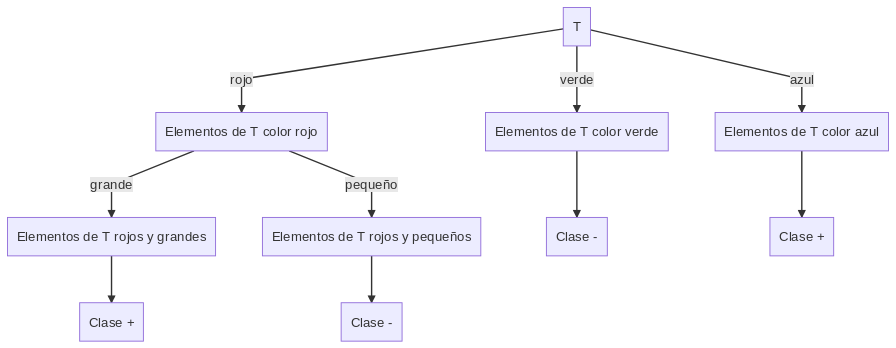

### Evaluación del desempeño

Existen varios métodos para medir el rendimiento de los modelos
generados por los algoritmos de aprendizaje automático, la mayoría
involucra algún tipo de relación entre los aciertos y errores hechos por
el modelo en sus predicciones.

Si consideramos una *matriz de confusion* podemos generar distintas
métricas para medir la efectividad de un modelo.

| Predicción  Realidad | Positivo                | Negativo                |
|----------------------|:------------------------|:------------------------|
| Positivo             | Verdadero positivo (TP) | Falso Positivo (FP)     |
| Negativo             | Falso negativo (FN)     | Verdadero Negativo (TN) |

Las funciones de evaluación más comunes son:

-   Recall, Sensibilidad o True positive rate: $$\frac{TP}{TP + FN}$$
-   Especificidad o True negative rate: $$\frac{TN}{TN + FP}$$
-   Precisión: $$\frac{TP}{TP + FP}$$
-   F-score:
    $$2 \cdot \frac{precision \cdot recall}{precision + recall}$$

Como podemos ver F-score hace un balance de la precisión y la
sensibilidad de un modelo, lo que nos da una medida mas realista de su
desempeño, por esto es una medida de evaluación frecuentemente usada
para probar sistemas de clasificación.

### Random Forest

Random Forest es una técnica usada en el entrenamiento de árboles de
decisión. Consisten en generar varios árboles de decisión, cada uno de
ellos conoce solo algunos de todos los atributos disponibles para
separar los datos. Esto evita el problema más común de los árboles de
decisión: el sobreajuste.

Los atributos que se dan a cada árbol se eligen de forma aleatoria y se
evalúa a cada árbol para decidir cuál de todos los árboles generados es
el mejor.

Desarrollo
----------

### Implementación del algoritmo ID3 desde cero

#### Antes de comenzar

Para realizar la implementación del algoritmo ID3 requerimos previamente
de la estructura de datos del árbol. En el archivo `src/Tree.jl` se
encuentra el código de un árbol sencillo que almacena condiciones y es
capaz de evaluar datos a partir de ellas.

In [ ]:
push!(LOAD_PATH, "./src")
using Tree, CSV, Table